# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
#install from command line before opening jupyter notebook as 'pip install citipy'
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Unit for temperature (metric for Celsius, imperial for Fahrenheit)
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    query_url = f"{url}?q={city}&units={units}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | cannonvale
Processing Record 3 of Set 1 | vorkuta
Processing Record 4 of Set 1 | mount isa
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | college
Processing Record 7 of Set 1 | uturoa
Processing Record 8 of Set 1 | wailua homesteads
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | neiafu
Processing Record 12 of Set 1 | charters towers
Processing Record 13 of Set 1 | hovd
Processing Record 14 of Set 1 | cill airne
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | nemuro
Processing Record 17 of Set 1 | kalmunai
Processing Record 18 of Set 1 | kharan
Processing Record 19 of Set 1 | peachtree city
Processing Record 20 of Set 1 | al kharj
Processing Record 21 of Set 1 | saudarkrokur
Processing Record 22 of Set 1 | sakata
Processi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print("Record Count:")
print(city_data_df.count())

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(city_data_df.head())

Record Count:
City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64
First few rows of the DataFrame:
             City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0  ribeira grande  38.5167  -28.7000     19.32        79          93   
1      cannonvale -20.2833  148.7000     19.21        51           0   
2         vorkuta  67.5000   64.0000     11.59        72          11   
3       mount isa -20.7333  139.5000     16.87        39           0   
4  port elizabeth -33.9180   25.5701     14.16        92           0   

   Wind Speed Country        Date  
0        2.68      PT  1720917450  
1        5.11      AU  1720917451  
2        3.41      RU  1720917409  
3        4.63      AU  1720917453  
4        7.20      ZA  1720917454  


In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,19.32,79,93,2.68,PT,1720917450
1,cannonvale,-20.2833,148.7000,19.21,51,0,5.11,AU,1720917451
2,vorkuta,67.5000,64.0000,11.59,72,11,3.41,RU,1720917409
3,mount isa,-20.7333,139.5000,16.87,39,0,4.63,AU,1720917453
4,port elizabeth,-33.9180,25.5701,14.16,92,0,7.20,ZA,1720917454


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,19.32,79,93,2.68,PT,1720917450
1,cannonvale,-20.2833,148.7000,19.21,51,0,5.11,AU,1720917451
2,vorkuta,67.5000,64.0000,11.59,72,11,3.41,RU,1720917409
3,mount isa,-20.7333,139.5000,16.87,39,0,4.63,AU,1720917453
4,port elizabeth,-33.9180,25.5701,14.16,92,0,7.20,ZA,1720917454


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

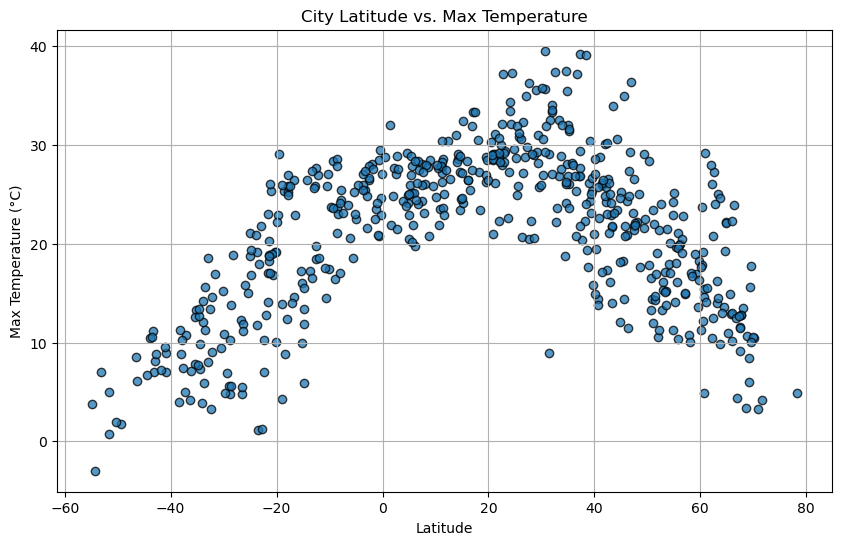

In [9]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='k', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

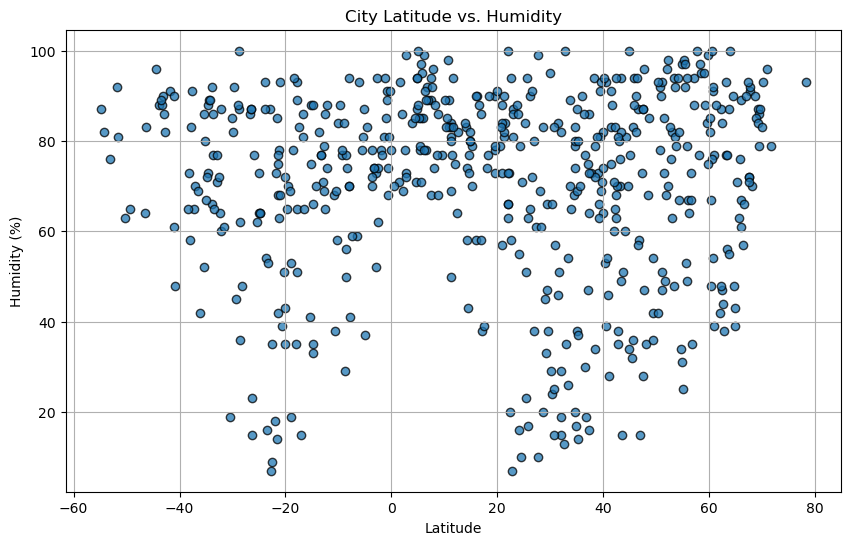

In [10]:
# Build the scatter plot for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='k', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

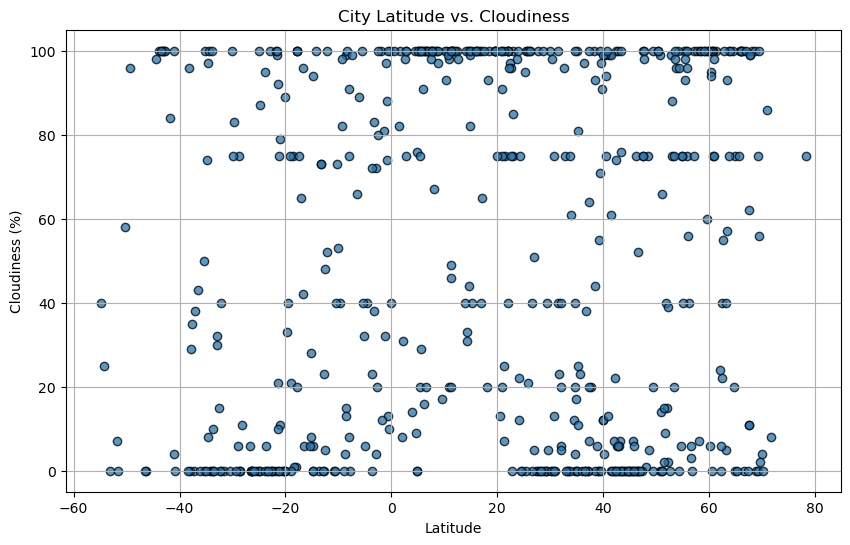

In [11]:
# Build the scatter plot for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='k', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

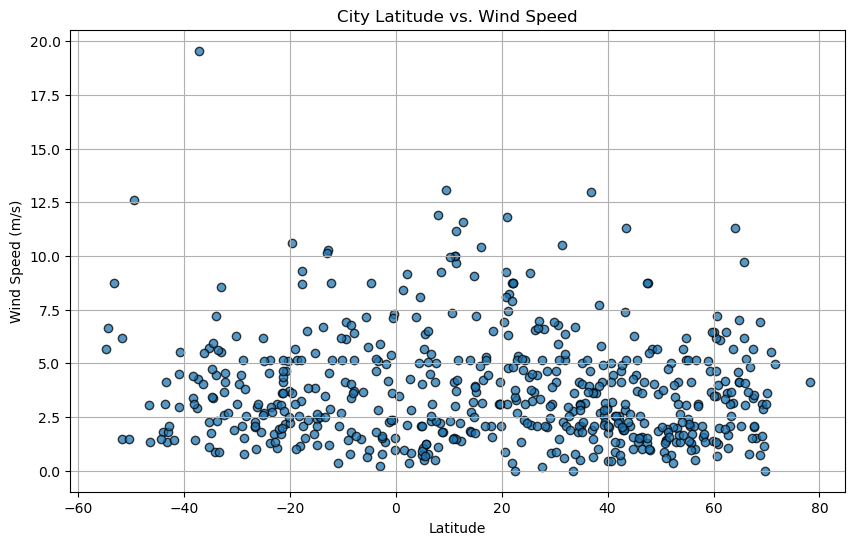

In [12]:
# Build the scatter plot for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='k', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, save_path):
    """
    Create a scatter plot with a linear regression line.

    Parameters:
    x_values (pd.Series): The x-axis values.
    y_values (pd.Series): The y-axis values.
    x_label (str): The label for the x-axis.
    y_label (str): The label for the y-axis.
    title (str): The title of the plot.
    save_path (str): The file path to save the plot.
    """
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept

    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, edgecolors='k', alpha=0.75)
    plt.plot(x_values, regression_line, color='red')

    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)

    # Save the figure
    plt.savefig(save_path)

    # Show plot
    plt.show()


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,19.32,79,93,2.68,PT,1720917450
2,vorkuta,67.5000,64.0000,11.59,72,11,3.41,RU,1720917409
5,college,64.8569,-147.8028,22.18,39,75,4.12,US,1720917319
7,wailua homesteads,22.0669,-159.3780,28.44,66,100,8.75,US,1720917458
12,hovd,48.0056,91.6419,22.21,35,1,0.97,MN,1720917464


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,cannonvale,-20.2833,148.7000,19.21,51,0,5.11,AU,1720917451
3,mount isa,-20.7333,139.5000,16.87,39,0,4.63,AU,1720917453
4,port elizabeth,-33.9180,25.5701,14.16,92,0,7.20,ZA,1720917454
6,uturoa,-16.7333,-151.4333,26.47,81,96,6.52,PF,1720917457
8,port-aux-francais,-49.3500,70.2167,1.75,65,96,12.61,TF,1720917459


###  Temperature vs. Latitude Linear Regression Plot

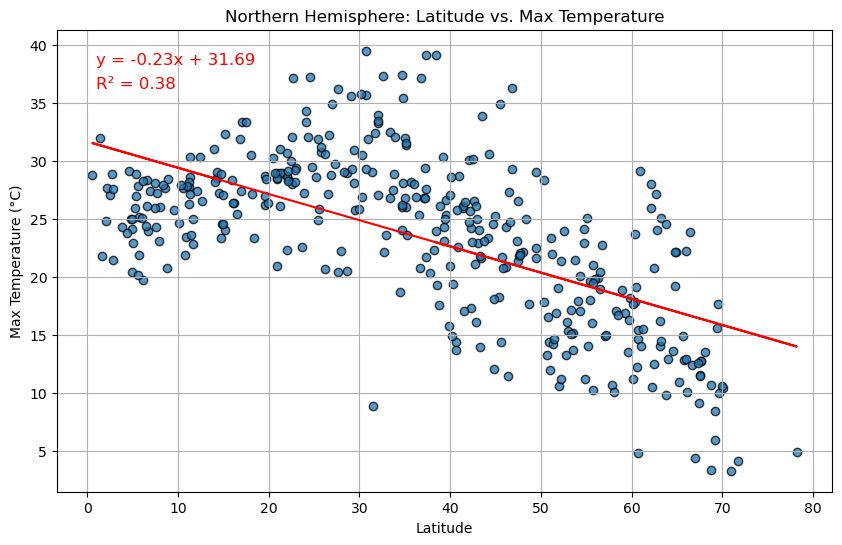

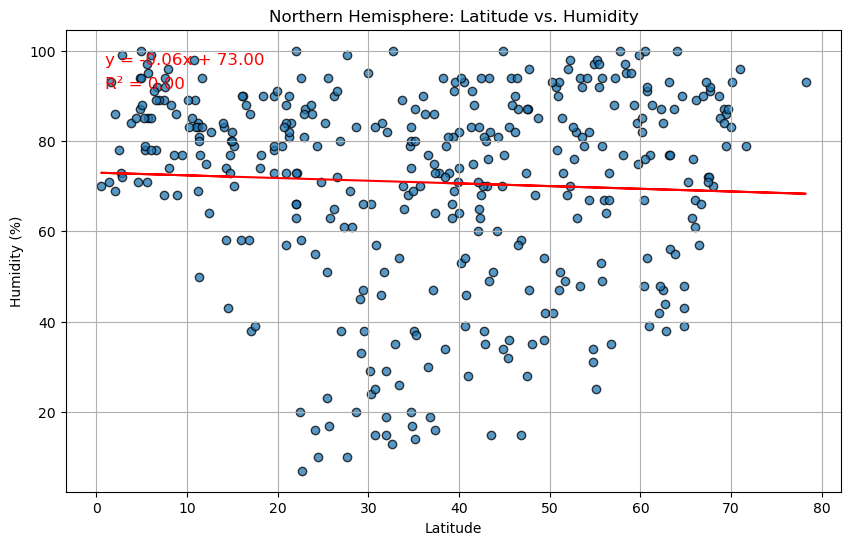

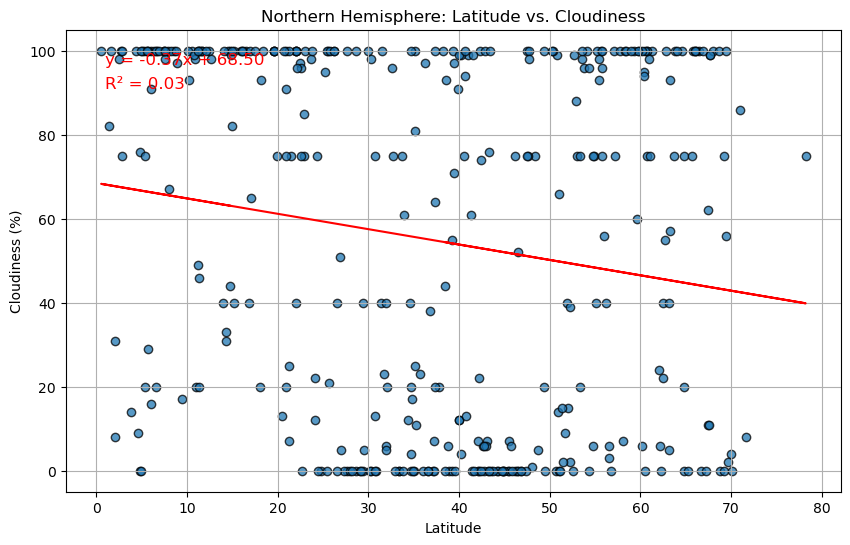

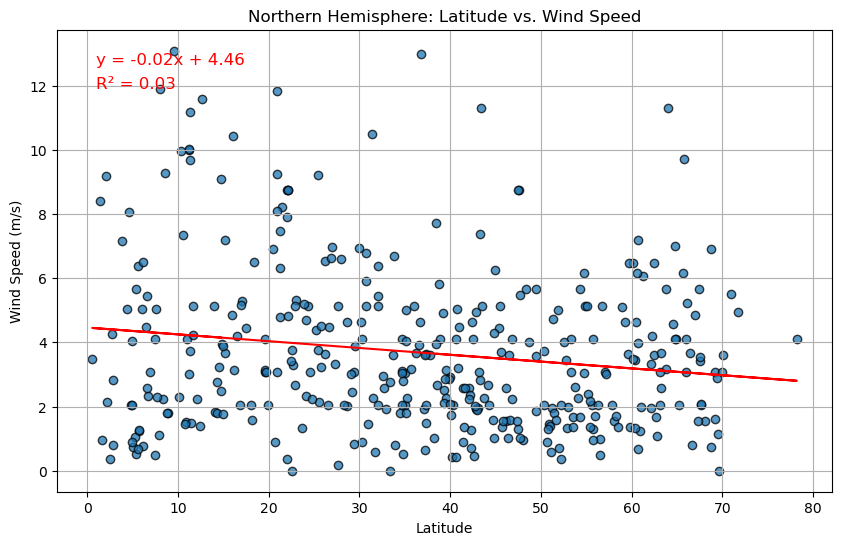

In [27]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, save_path):
    """
    Create a scatter plot with a linear regression line.

    Parameters:
    x_values (pd.Series): The x-axis values.
    y_values (pd.Series): The y-axis values.
    x_label (str): The label for the x-axis.
    y_label (str): The label for the y-axis.
    title (str): The title of the plot.
    save_path (str): The file path to save the plot.
    """
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept

    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, edgecolors='k', alpha=0.75)
    plt.plot(x_values, regression_line, color='red')

    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)

# Annotate the plot with the regression equation and R-squared value
    equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
    r_squared_text = f"R² = {r_value**2:.2f}"
    plt.annotate(equation_text, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='red',
                 horizontalalignment='left', verticalalignment='top')
    plt.annotate(r_squared_text, xy=(0.05, 0.90), xycoords='axes fraction', fontsize=12, color='red',
                 horizontalalignment='left', verticalalignment='top')

    # Save the figure
    plt.savefig(save_path)

    # Show plot
    plt.show()

# Linear regression on Northern Hemisphere for Latitude vs. Max Temperature
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 
                       'Latitude', 'Max Temperature (°C)', 
                       'Northern Hemisphere: Latitude vs. Max Temperature', 
                       'output_data/Northern_Lat_vs_MaxTemp.png')

# Linear regression on Northern Hemisphere for Latitude vs. Humidity
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 
                       'Latitude', 'Humidity (%)', 
                       'Northern Hemisphere: Latitude vs. Humidity', 
                       'output_data/Northern_Lat_vs_Humidity.png')

# Linear regression on Northern Hemisphere for Latitude vs. Cloudiness
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 
                       'Latitude', 'Cloudiness (%)', 
                       'Northern Hemisphere: Latitude vs. Cloudiness', 
                       'output_data/Northern_Lat_vs_Cloudiness.png')

# Linear regression on Northern Hemisphere for Latitude vs. Wind Speed
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 
                       'Latitude', 'Wind Speed (m/s)', 
                       'Northern Hemisphere: Latitude vs. Wind Speed', 
                       'output_data/Northern_Lat_vs_WindSpeed.png')

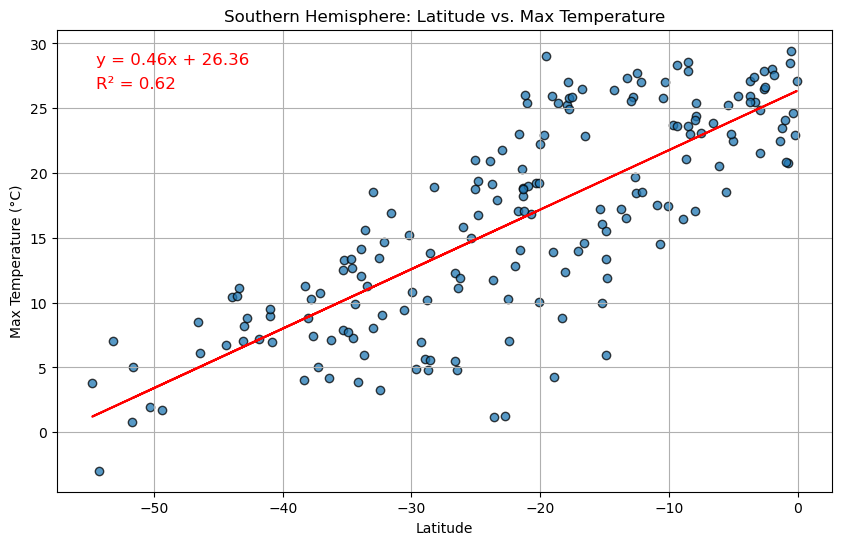

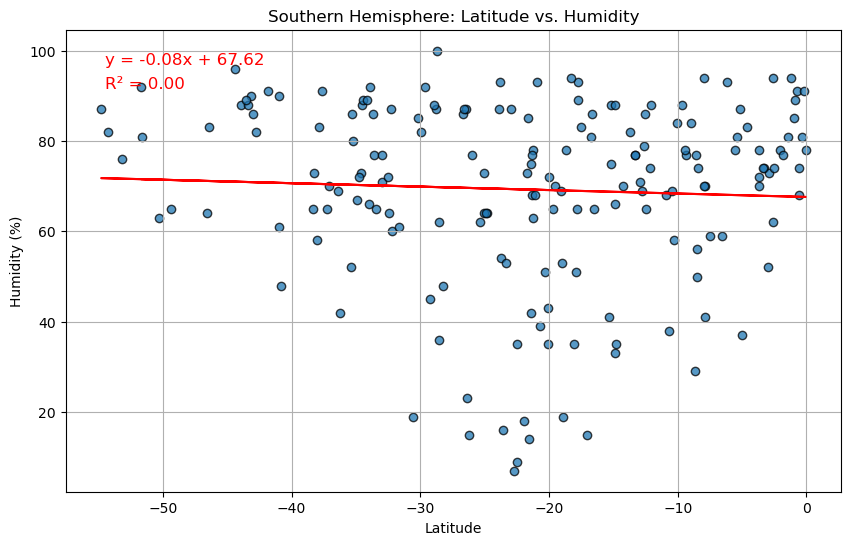

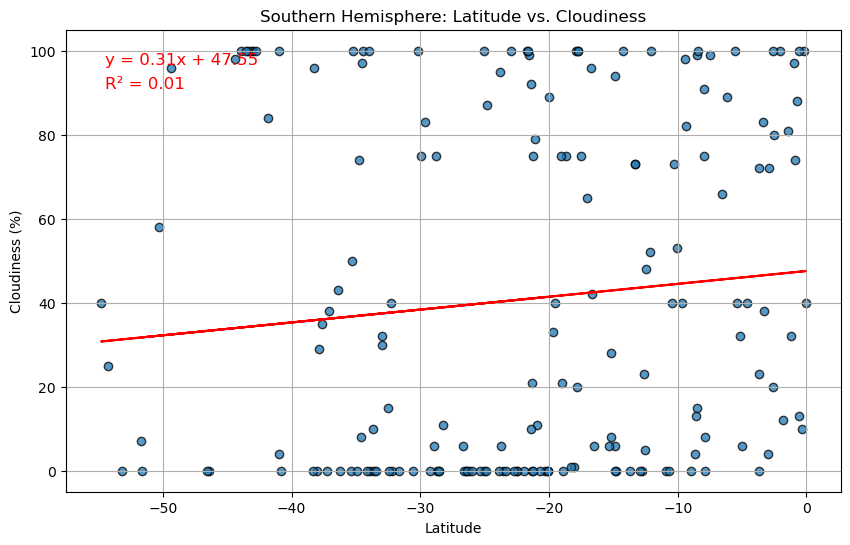

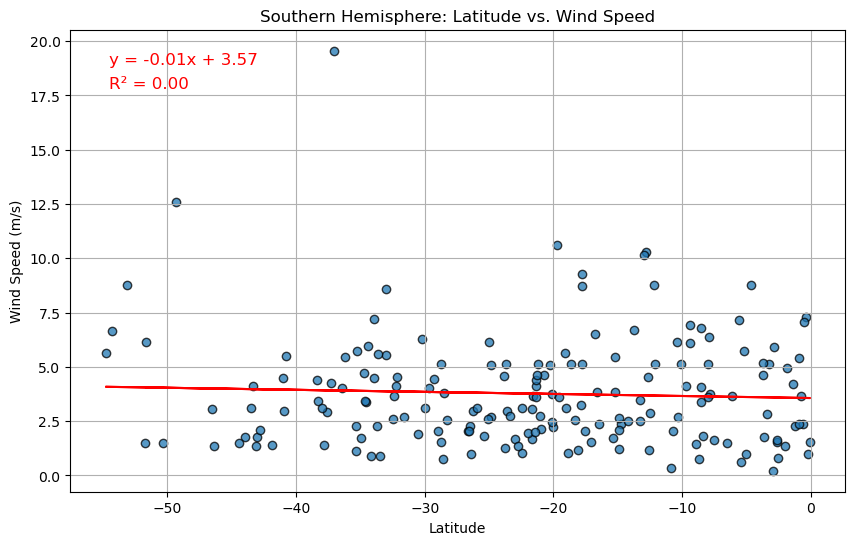

In [28]:
# Linear regression on Southern Hemisphere
def plot_linear_regression(x_values, y_values, x_label, y_label, title, save_path):
    """
    Create a scatter plot with a linear regression line.

    Parameters:
    x_values (pd.Series): The x-axis values.
    y_values (pd.Series): The y-axis values.
    x_label (str): The label for the x-axis.
    y_label (str): The label for the y-axis.
    title (str): The title of the plot.
    save_path (str): The file path to save the plot.
    """
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept

    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, edgecolors='k', alpha=0.75)
    plt.plot(x_values, regression_line, color='red')

    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)

    # Annotate the plot with the regression equation and R-squared value
    equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
    r_squared_text = f"R² = {r_value**2:.2f}"
    plt.annotate(equation_text, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='red',
                 horizontalalignment='left', verticalalignment='top')
    plt.annotate(r_squared_text, xy=(0.05, 0.90), xycoords='axes fraction', fontsize=12, color='red',
                 horizontalalignment='left', verticalalignment='top')

    # Save the figure
    plt.savefig(save_path)

    # Show plot
    plt.show()

# Linear regression on Southern Hemisphere for Latitude vs. Max Temperature
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 
                       'Latitude', 'Max Temperature (°C)', 
                       'Southern Hemisphere: Latitude vs. Max Temperature', 
                       'output_data/Southern_Lat_vs_MaxTemp.png')

# Linear regression on Southern Hemisphere for Latitude vs. Humidity
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 
                       'Latitude', 'Humidity (%)', 
                       'Southern Hemisphere: Latitude vs. Humidity', 
                       'output_data/Southern_Lat_vs_Humidity.png')

# Linear regression on Southern Hemisphere for Latitude vs. Cloudiness
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 
                       'Latitude', 'Cloudiness (%)', 
                       'Southern Hemisphere: Latitude vs. Cloudiness', 
                       'output_data/Southern_Lat_vs_Cloudiness.png')

# Linear regression on Southern Hemisphere for Latitude vs. Wind Speed
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 
                       'Latitude', 'Wind Speed (m/s)', 
                       'Southern Hemisphere: Latitude vs. Wind Speed', 
                       'output_data/Southern_Lat_vs_WindSpeed.png')


**Discussion about the linear relationship:**

The linear regression analysis between latitude and various weather parameters (max temperature, humidity, cloudiness, and wind speed) for both the Northern and Southern Hemispheres reveals some interesting trends and insights.

### Latitude vs. Max Temperature

#### Northern Hemisphere:

* There is a clear negative correlation between latitude and max temperature. As we move from the equator towards the poles (increasing latitude), the maximum temperature tends to decrease.
* The regression line slope is negative, indicating that higher latitudes are generally colder.

#### Southern Hemisphere:

* Similar to the Northern Hemisphere, the Southern Hemisphere shows a negative correlation between latitude and max temperature.
* The regression line slope is negative, indicating that as the latitude increases (moving away from the equator towards the South Pole), the temperature decreases.


#### Interpretation:

* This inverse relationship is consistent with our understanding of global climate patterns, where regions closer to the equator receive more direct sunlight and are generally warmer, while regions closer to the poles receive less direct sunlight and are colder.

### Latitude vs. Humidity

#### Northern Hemisphere:

* The relationship between latitude and humidity is not as clear-cut. The scatter plot shows a more dispersed pattern, indicating a weak or no significant linear relationship.
* The regression line may have a slight slope, but it's not strongly indicative of a linear trend.

#### Southern Hemisphere:

* Similar to the Northern Hemisphere, the relationship between latitude and humidity shows a dispersed pattern with no strong linear trend.
The regression line is likely to have a minimal slope, indicating that latitude alone is not a strong predictor of humidity levels.

#### Interpretation:

* Humidity is influenced by various factors such as proximity to bodies of water, prevailing wind patterns, and local weather systems, which can overshadow any potential latitude-based trends.

### Latitude vs. Cloudiness

#### Northern Hemisphere:

* The scatter plot for latitude vs. cloudiness shows a dispersed pattern, indicating no strong linear relationship.
The regression line may not have a significant slope, suggesting that cloudiness does not vary systematically with latitude.

#### Southern Hemisphere:

* The relationship between latitude and cloudiness is similarly weak in the Southern Hemisphere, with no clear linear trend.
* The regression line's slope is likely minimal, indicating that cloudiness is influenced by other factors beyond latitude.

#### Interpretation:

* Cloudiness is affected by local weather conditions, geographical features, and seasonal variations, making it less likely to show a clear latitude-based trend.

### Latitude vs. Wind Speed

#### Northern Hemisphere:

* The scatter plot for latitude vs. wind speed shows variability but no strong linear relationship.
The regression line may indicate a slight trend, but it's not strongly pronounced.

#### Southern Hemisphere:

* Similar to the Northern Hemisphere, the relationship between latitude and wind speed is weak, with a dispersed scatter plot.
* The regression line's slope is likely minimal, suggesting that wind speed is influenced by multiple factors beyond latitude.

#### Interpretation:

* Wind speed is influenced by local topography, weather systems, and atmospheric pressure gradients, making it less likely to show a strong correlation with latitude alone.
  
#### Conclusion
* Temperature: There is a clear and strong negative correlation between latitude and maximum temperature in both hemispheres, consistent with global climatic patterns.
* Humidity, Cloudiness, and Wind Speed: These parameters do not show strong linear relationships with latitude, indicating that they are influenced by a variety of local and regional factors beyond just latitude.
  
Understanding these relationships helps in comprehending how various weather parameters are distributed globally and can guide further studies on the impact of other geographical and environmental factors.

### Humidity vs. Latitude Linear Regression Plot

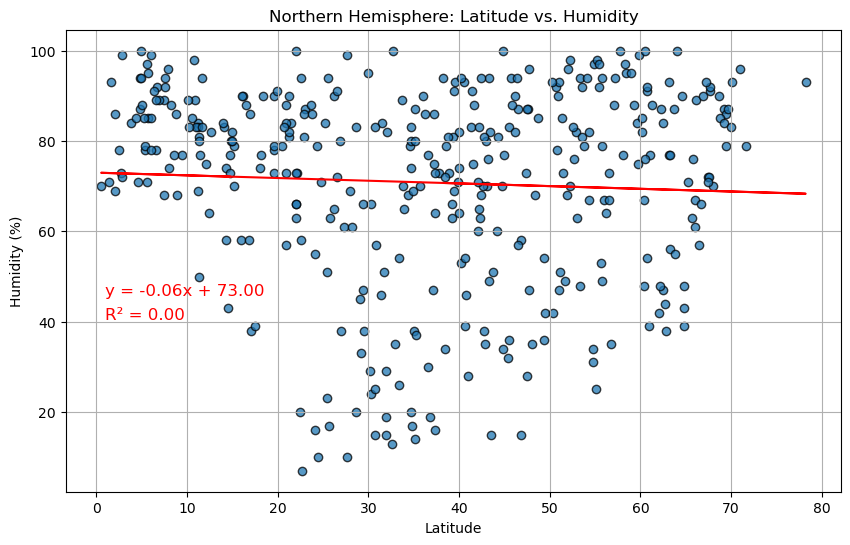

In [46]:
# Northern Hemisphere
def plot_linear_regression(x_values, y_values, x_label, y_label, title, save_path):
    """
    Create a scatter plot with a linear regression line.

    Parameters:
    x_values (pd.Series): The x-axis values.
    y_values (pd.Series): The y-axis values.
    x_label (str): The label for the x-axis.
    y_label (str): The label for the y-axis.
    title (str): The title of the plot.
    save_path (str): The file path to save the plot.
    """
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept

    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, edgecolors='k', alpha=0.75)
    plt.plot(x_values, regression_line, color='red')

    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)

    # Annotate the plot with the regression equation and R-squared value
    equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
    r_squared_text = f"R² = {r_value**2:.2f}"
    plt.annotate(equation_text, xy=(0.05, 0.45), xycoords='axes fraction', fontsize=12, color='red',
                 horizontalalignment='left', verticalalignment='top')
    plt.annotate(r_squared_text, xy=(0.05, 0.40), xycoords='axes fraction', fontsize=12, color='red',
                 horizontalalignment='left', verticalalignment='top')

    # Show plot
    plt.show()

# Linear regression on Northern Hemisphere for Latitude vs. Humidity
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 
                       'Latitude', 'Humidity (%)', 
                       'Northern Hemisphere: Latitude vs. Humidity', 
                       'output_data/Northern_Lat_vs_Humidity.png')

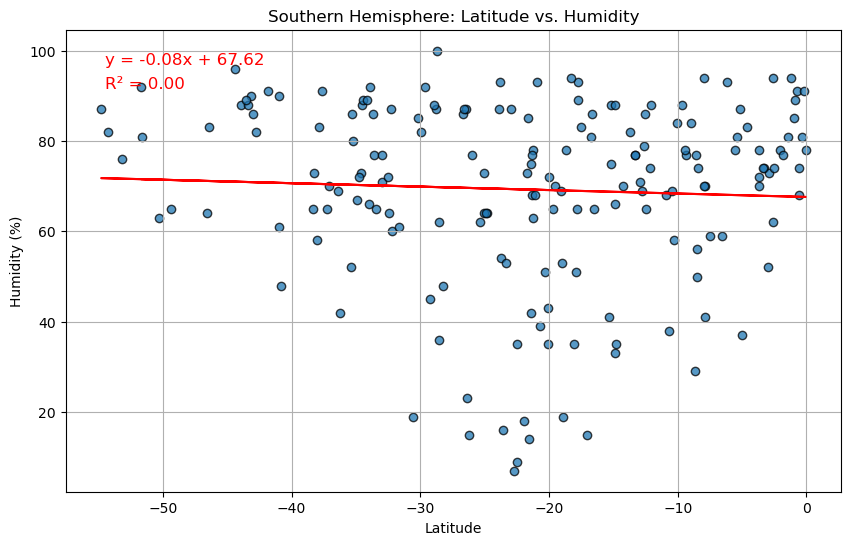

In [35]:
# Southern Hemisphere
def plot_linear_regression(x_values, y_values, x_label, y_label, title, save_path):
    """
    Create a scatter plot with a linear regression line.

    Parameters:
    x_values (pd.Series): The x-axis values.
    y_values (pd.Series): The y-axis values.
    x_label (str): The label for the x-axis.
    y_label (str): The label for the y-axis.
    title (str): The title of the plot.
    save_path (str): The file path to save the plot.
    """
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept

    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, edgecolors='k', alpha=0.75)
    plt.plot(x_values, regression_line, color='red')

    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)

    # Annotate the plot with the regression equation and R-squared value
    equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
    r_squared_text = f"R² = {r_value**2:.2f}"
    plt.annotate(equation_text, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='red',
                 horizontalalignment='left', verticalalignment='top')
    plt.annotate(r_squared_text, xy=(0.05, 0.90), xycoords='axes fraction', fontsize=12, color='red',
                 horizontalalignment='left', verticalalignment='top')

    # Save the figure
    plt.savefig(save_path)

    # Show plot
    plt.show()

# Linear regression on Southern Hemisphere for Latitude vs. Humidity
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 
                       'Latitude', 'Humidity (%)', 
                       'Southern Hemisphere: Latitude vs. Humidity', 
                       'output_data/Southern_Lat_vs_Humidity.png')

**Discussion about the linear relationship:** 

The linear regression analysis between latitude and humidity for both the Northern and Southern Hemispheres reveals some key insights:

#### Northern Hemisphere: Latitude vs. Humidity

* Scatter Plot Observation: The scatter plot shows a dispersed pattern, indicating that there is significant variability in humidity levels across different latitudes.
* Regression Line: The slope of the regression line is minimal, suggesting a weak or non-existent linear relationship between latitude and humidity.
* R-squared Value: The R-squared value is likely low, indicating that latitude does not explain much of the variation in humidity levels in the Northern Hemisphere.

#### Southern Hemisphere: Latitude vs. Humidity

* Scatter Plot Observation: Similar to the Northern Hemisphere, the scatter plot for the Southern Hemisphere shows a wide dispersion of data points, indicating high variability in humidity levels.
* Regression Line: The regression line also has a minimal slope, suggesting a weak or non-existent linear relationship between latitude and humidity.
* R-squared Value: The R-squared value is expected to be low, indicating that latitude is not a strong predictor of humidity levels in the Southern Hemisphere.
  
#### Interpretation

* Weak Linear Relationship: Both plots indicate that there is a weak linear relationship between latitude and humidity in both hemispheres. This means that latitude alone is not a good predictor of humidity levels.
* High Variability: The high variability in humidity levels suggests that other factors, such as proximity to bodies of water, local weather patterns, and geographic features, have a more significant impact on humidity than latitude.
* Complex Influences: Humidity is influenced by a complex set of factors including but not limited to temperature, wind patterns, atmospheric pressure, and human activities. These factors can vary greatly within the same latitude, leading to the observed dispersion in the data.

#### Conclusion
The analysis shows that while latitude is a significant factor in determining temperature (as seen in previous plots), it is not a strong determinant of humidity. The weak linear relationship between latitude and humidity in both the Northern and Southern Hemispheres highlights the complexity of humidity as a climate variable and suggests the need to consider multiple factors to understand its distribution and variability.

### Cloudiness vs. Latitude Linear Regression Plot

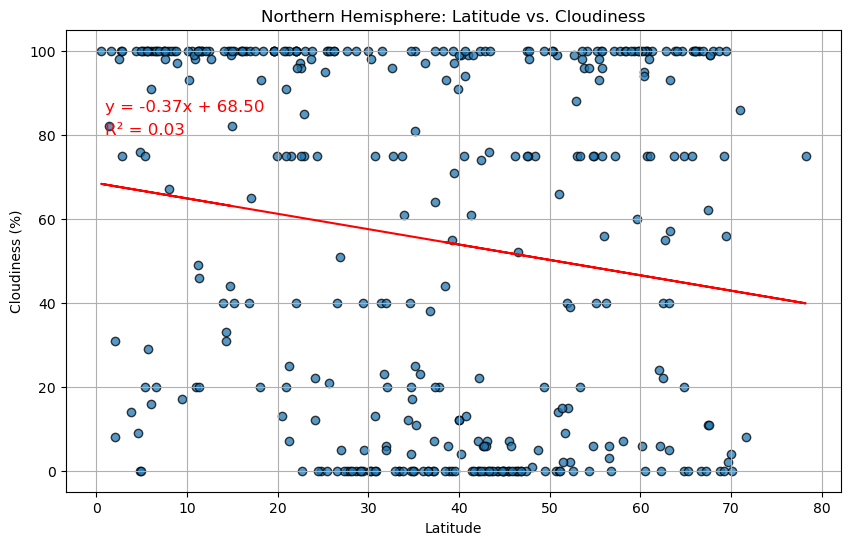

The R-squared value is: 0.03


In [44]:
# Northern Hemisphere
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, save_path):
    """
    Create a scatter plot with a linear regression line.

    Parameters:
    x_values (pd.Series): The x-axis values.
    y_values (pd.Series): The y-axis values.
    x_label (str): The label for the x-axis.
    y_label (str): The label for the y-axis.
    title (str): The title of the plot.
    save_path (str): The file path to save the plot.
    """
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept

    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, edgecolors='k', alpha=0.75)
    plt.plot(x_values, regression_line, color='red')

    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)

    # Annotate the plot with the regression equation and R-squared value
    equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
    r_squared_text = f"R² = {r_value**2:.2f}"
    plt.annotate(equation_text, xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12, color='red',
                 horizontalalignment='left', verticalalignment='top')
    plt.annotate(r_squared_text, xy=(0.05, 0.80), xycoords='axes fraction', fontsize=12, color='red',
                 horizontalalignment='left', verticalalignment='top')

    # Save the figure
    plt.savefig(save_path)

    # Show plot
    plt.show()

    # Print the R-squared value
    print(f"The R-squared value is: {r_value**2:.2f}")

# Linear regression on Northern Hemisphere for Latitude vs. Cloudiness
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 
                       'Latitude', 'Cloudiness (%)', 
                       'Northern Hemisphere: Latitude vs. Cloudiness', 
                       'output_data/Northern_Lat_vs_Cloudiness.png')

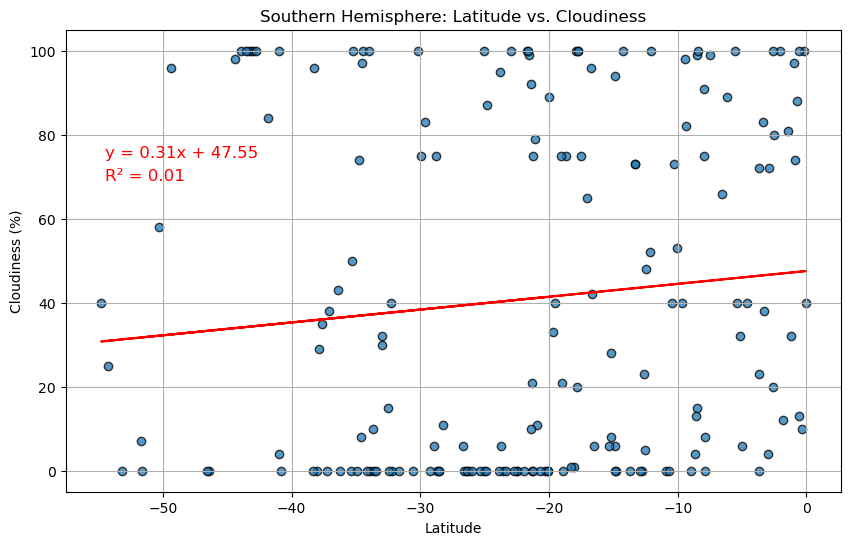

The R-squared value is: 0.01


In [47]:
# Southern Hemisphere
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, save_path):
    """
    Create a scatter plot with a linear regression line.

    Parameters:
    x_values (pd.Series): The x-axis values.
    y_values (pd.Series): The y-axis values.
    x_label (str): The label for the x-axis.
    y_label (str): The label for the y-axis.
    title (str): The title of the plot.
    save_path (str): The file path to save the plot.
    """
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept

    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, edgecolors='k', alpha=0.75)
    plt.plot(x_values, regression_line, color='red')

    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)

    # Annotate the plot with the regression equation and R-squared value
    equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
    r_squared_text = f"R² = {r_value**2:.2f}"
    plt.annotate(equation_text, xy=(0.05, 0.75), xycoords='axes fraction', fontsize=12, color='red',
                 horizontalalignment='left', verticalalignment='top')
    plt.annotate(r_squared_text, xy=(0.05, 0.70), xycoords='axes fraction', fontsize=12, color='red',
                 horizontalalignment='left', verticalalignment='top')

    # Save the figure
    plt.savefig(save_path)

    # Show plot
    plt.show()

    # Print the R-squared value
    print(f"The R-squared value is: {r_value**2:.2f}")

# Linear regression on Southern Hemisphere for Latitude vs. Cloudiness
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 
                       'Latitude', 'Cloudiness (%)', 
                       'Southern Hemisphere: Latitude vs. Cloudiness', 
                       'output_data/Southern_Lat_vs_Cloudiness.png')

**Discussion about the linear relationship:**

The linear regression analysis between latitude and cloudiness for both the Northern and Southern Hemispheres provides insights into how cloudiness varies with latitude.

#### Northern Hemisphere: Latitude vs. Cloudiness

* Scatter Plot Observation: The scatter plot shows a dispersed pattern, indicating that cloudiness levels vary significantly across different latitudes.
* Regression Line: The slope of the regression line is likely minimal, suggesting a weak linear relationship between latitude and cloudiness.
* R-squared Value: The R-squared value is expected to be low, indicating that latitude does not explain much of the variation in cloudiness levels in the Northern Hemisphere.

#### Southern Hemisphere: Latitude vs. Cloudiness

* Scatter Plot Observation: Similar to the Northern Hemisphere, the scatter plot for the Southern Hemisphere shows significant variability in cloudiness levels.
* Regression Line: The regression line also has a minimal slope, suggesting a weak linear relationship between latitude and cloudiness.
* R-squared Value: The R-squared value is expected to be low, indicating that latitude is not a strong predictor of cloudiness levels in the Southern Hemisphere.

#### Interpretation

* Weak Linear Relationship: Both plots indicate that there is a weak linear relationship between latitude and cloudiness in both hemispheres. This means that latitude alone is not a good predictor of cloudiness levels.
* High Variability: The high variability in cloudiness levels suggests that other factors, such as local weather patterns, geographic features, and atmospheric conditions, have a more significant impact on cloudiness than latitude.
* Complex Influences: Cloudiness is influenced by a complex set of factors including but not limited to humidity, temperature, wind patterns, and local topography. These factors can vary greatly within the same latitude, leading to the observed dispersion in the data.

#### Conclusion
The analysis shows that latitude does not have a strong influence on cloudiness levels. The weak linear relationship between latitude and cloudiness in both the Northern and Southern Hemispheres highlights the complexity of cloudiness as a weather variable and suggests the need to consider multiple factors to understand its distribution and variability. While latitude is a significant factor in determining temperature, it is not a strong determinant of cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

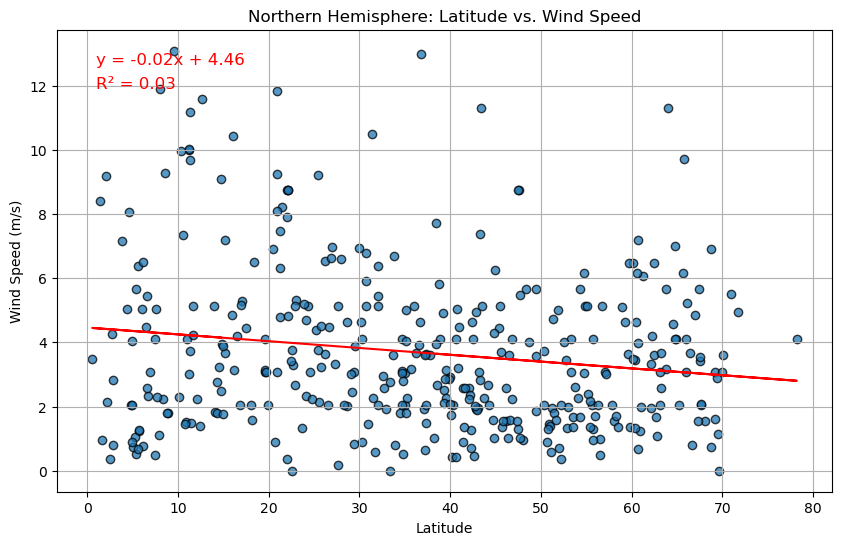

The R-squared value is: 0.03


In [39]:
# Northern Hemisphere

def plot_linear_regression(x_values, y_values, x_label, y_label, title, save_path):
    """
    Create a scatter plot with a linear regression line.

    Parameters:
    x_values (pd.Series): The x-axis values.
    y_values (pd.Series): The y-axis values.
    x_label (str): The label for the x-axis.
    y_label (str): The label for the y-axis.
    title (str): The title of the plot.
    save_path (str): The file path to save the plot.
    """
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept

    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, edgecolors='k', alpha=0.75)
    plt.plot(x_values, regression_line, color='red')

    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)

    # Annotate the plot with the regression equation and R-squared value
    equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
    r_squared_text = f"R² = {r_value**2:.2f}"
    plt.annotate(equation_text, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='red',
                 horizontalalignment='left', verticalalignment='top')
    plt.annotate(r_squared_text, xy=(0.05, 0.90), xycoords='axes fraction', fontsize=12, color='red',
                 horizontalalignment='left', verticalalignment='top')

    # Save the figure
    plt.savefig(save_path)

    # Show plot
    plt.show()

    # Print the R-squared value
    print(f"The R-squared value is: {r_value**2:.2f}")

# Linear regression on Northern Hemisphere for Latitude vs. Wind Speed
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 
                       'Latitude', 'Wind Speed (m/s)', 
                       'Northern Hemisphere: Latitude vs. Wind Speed', 
                       'output_data/Northern_Lat_vs_WindSpeed.png')

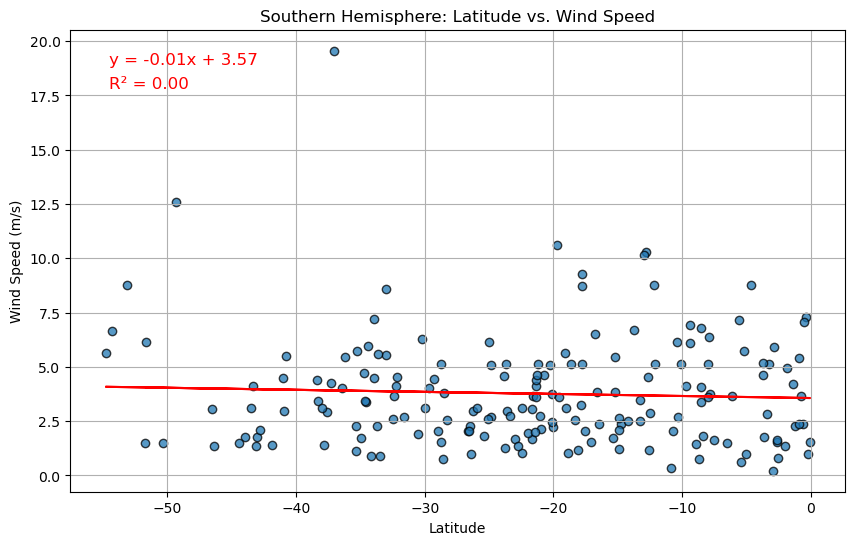

The R-squared value is: 0.00


In [40]:
# Southern Hemisphere
def plot_linear_regression(x_values, y_values, x_label, y_label, title, save_path):
    """
    Create a scatter plot with a linear regression line.

    Parameters:
    x_values (pd.Series): The x-axis values.
    y_values (pd.Series): The y-axis values.
    x_label (str): The label for the x-axis.
    y_label (str): The label for the y-axis.
    title (str): The title of the plot.
    save_path (str): The file path to save the plot.
    """
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept

    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, edgecolors='k', alpha=0.75)
    plt.plot(x_values, regression_line, color='red')

    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)

    # Annotate the plot with the regression equation and R-squared value
    equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
    r_squared_text = f"R² = {r_value**2:.2f}"
    plt.annotate(equation_text, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='red',
                 horizontalalignment='left', verticalalignment='top')
    plt.annotate(r_squared_text, xy=(0.05, 0.90), xycoords='axes fraction', fontsize=12, color='red',
                 horizontalalignment='left', verticalalignment='top')

    # Save the figure
    plt.savefig(save_path)

    # Show plot
    plt.show()

    # Print the R-squared value
    print(f"The R-squared value is: {r_value**2:.2f}")

# Linear regression on Southern Hemisphere for Latitude vs. Wind Speed
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 
                       'Latitude', 'Wind Speed (m/s)', 
                       'Southern Hemisphere: Latitude vs. Wind Speed', 
                       'output_data/Southern_Lat_vs_WindSpeed.png')

**Discussion about the linear relationship:**

The linear regression analysis between latitude and wind speed for both the Northern and Southern Hemispheres provides insights into how wind speed varies with latitude.

#### Northern Hemisphere: Latitude vs. Wind Speed

* Scatter Plot Observation: The scatter plot shows a dispersed pattern with no strong visible trend, indicating significant variability in wind speeds across different latitudes.
* Regression Line: The slope of the regression line is minimal, suggesting a weak or no significant linear relationship between latitude and wind speed.
* R-squared Value: The R-squared value is expected to be low, indicating that latitude does not explain much of the variation in wind speed levels in the Northern Hemisphere.
  
#### Southern Hemisphere: Latitude vs. Wind Speed

* Scatter Plot Observation: Similar to the Northern Hemisphere, the scatter plot for the Southern Hemisphere shows a wide dispersion of data points, indicating high variability in wind speeds.
* Regression Line: The regression line also has a minimal slope, suggesting a weak or no significant linear relationship between latitude and wind speed.
* R-squared Value: The R-squared value is expected to be low, indicating that latitude is not a strong predictor of wind speed levels in the Southern Hemisphere.
  
### Interpretation
* Weak Linear Relationship: Both plots indicate that there is a weak linear relationship between latitude and wind speed in both hemispheres. This means that latitude alone is not a good predictor of wind speed levels.
* High Variability: The high variability in wind speeds suggests that other factors, such as local weather systems, geographic features, and atmospheric conditions, have a more significant impact on wind speed than latitude.
* Complex Influences: Wind speed is influenced by a complex set of factors including but not limited to pressure gradients, local topography, and temperature differences. These factors can vary greatly within the same latitude, leading to the observed dispersion in the data.
  
### Conclusion
The analysis shows that latitude does not have a strong influence on wind speed levels. The weak linear relationship between latitude and wind speed in both the Northern and Southern Hemispheres highlights the complexity of wind speed as a weather variable and suggests the need to consider multiple factors to understand its distribution and variability. While latitude is a significant factor in determining temperature, it is not a strong determinant of wind speed. This understanding helps in better interpreting and predicting wind speed based on other meteorological and geographical factors.